# Inputs (RUN FIRST)

In [1]:
import os
# Chip number
chip_id = 'Pa1_g1_chip1'
# config file - path to your config file
config_file = '../configs/pa1_g1_chip1_config.yml' 
# generates new folder for saving outputs
newfolder = os.path.join('../output/',chip_id)
# number of timepoints to analyze
tp = 1
out_path = os.path.join(newfolder,chip_id)
# Make output data folder
os.makedirs(newfolder, exist_ok=True)

# Imports and config
- rescaling and bkg averaging

In [2]:
# imports
import yaml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%run '../../kchip/plotting_parameters.py'

# kchip imports
import sys
sys.path.insert(1, '../../')
import kchip.io as kchip_io
import kchip.analyze as kchip_analyze
import kchip.bchip as bchip

# Read in config file
with open(config_file, 'r') as ymlfile:
    config = yaml.load(ymlfile)

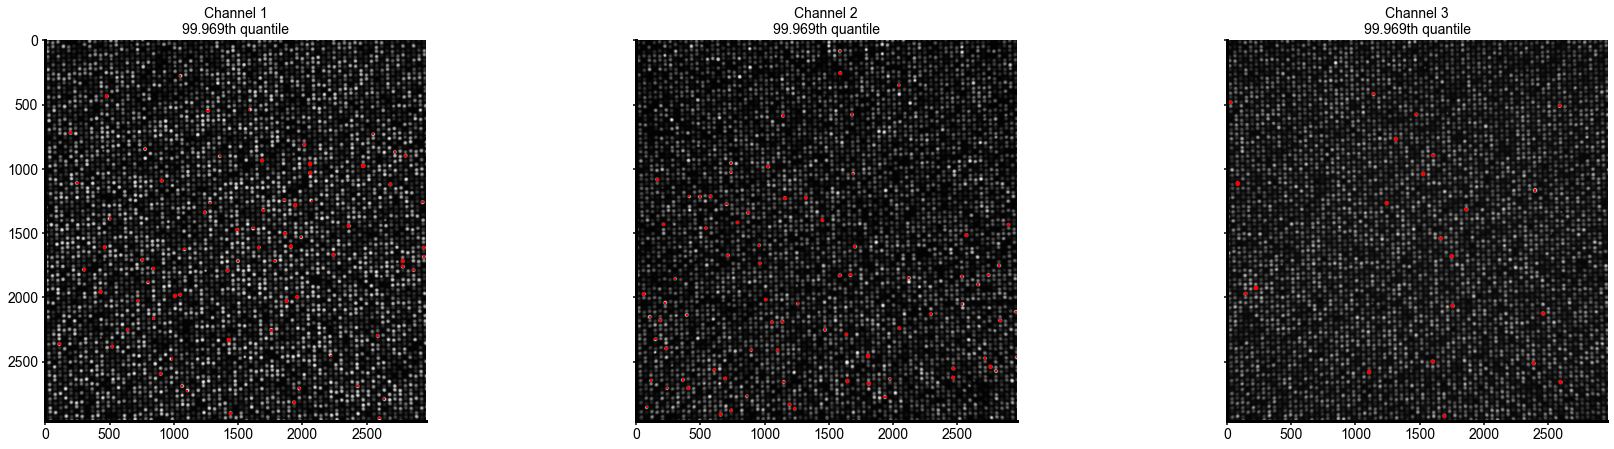

Rescale vector: [1.0, 1.0, 1.5, 1]


In [44]:
# RUN FIRST TIME ONLY
import kchip.rescale as kchip_r
kchip_r.rescale_config(config_file,config_file)

# Read in config file
with open(config_file, 'r') as ymlfile:
    config = yaml.load(ymlfile)

# import kchip.background as kchip_bkg
# kchip_bkg.avg_bkg(config)

# Create Droplets df
- Initialize from images
- Identify droplets in the same well from fit to masks
- Cluster
- Map apriori labels to clusters

In [3]:
from importlib import reload
reload(kchip_analyze)
with open(config_file, 'r') as ymlfile:
    config = yaml.load(ymlfile)
# Initialize droplets DataFrame from images
droplets, rotation_theta = kchip_analyze.initialize_droplets(config)
# print 'Rotation (degrees): ', rotation_theta*180/np.pi
droplets.to_csv(out_path+'droplets_found.csv')
## Identify droplets in the same well from fit to masks
# droplets = kchip_analyze.fit_droplets_to_mask(config,droplets,rotation_theta)
# droplets.to_csv('droplets_assigned.csv')

Found 5366 droplets from: 1,7
Found 5101 droplets from: 1,9
Found 4953 droplets from: 2,10
Found 5816 droplets from: 2,4
Found 5799 droplets from: 2,5
Found 5833 droplets from: 2,3
Found 2559 droplets from: 1,1
Found 5425 droplets from: 1,6
Found 4563 droplets from: 1,3
Found 5681 droplets from: 2,8
Found 4371 droplets from: 1,10
Found 3951 droplets from: 3,1
Found 5765 droplets from: 2,6
Found 5548 droplets from: 2,9
Found 5258 droplets from: 1,8
Found 4334 droplets from: 1,2
Found 5071 droplets from: 1,4
Found 5891 droplets from: 2,2
Found 5405 droplets from: 1,5
Found 5683 droplets from: 2,7
Found 5759 droplets from: 3,5
Found 5743 droplets from: 3,9
Found 3812 droplets from: 2,1
Found 5770 droplets from: 3,8
Found 5218 droplets from: 3,10
Found 5896 droplets from: 3,3
Found 5867 droplets from: 4,4
Found 5849 droplets from: 4,6
Found 5848 droplets from: 4,9
Found 5888 droplets from: 4,2
Found 5850 droplets from: 3,2
Found 5441 droplets from: 4,10
Found 5902 droplets from: 4,8
Found 

In [4]:
droplets = pd.read_csv(out_path+'droplets_found.csv',index_col=0)
# Remove overlap and identify drops in same well for k=2
print(droplets.shape)
# removes 5% image overlap AND pairs droplets in the same well
droplets = bchip.remove_overlap(config,droplets,show=1)
# creates a HASH unique to each well for k=2
droplets = bchip.hashdrops(droplets,config)
# # creates a HASH unique to each well for k=1
# droplets['Well_ID'] = droplets.index
# droplets['Hash'] = droplets.apply(lambda row: hash((row['IndexX'],row['IndexY'],row['Well_ID'])),axis=1)
# Saves droplets assigned to wells and prints droplet count
droplets.to_csv(out_path+'droplets_wells_assigned.csv')
print ('all droplets (overlap removed)',droplets.shape)

(357660, 10)
Removed: 58150 wells from dataFrame due to overlap in images.
all droplets (overlap removed) (299391, 12)


In [3]:
droplets = pd.read_csv(out_path+'droplets_found.csv',index_col=0)
# Remove overlap and identify drops in same well for k=2
print(droplets.shape)
# removes 5% image overlap AND pairs droplets in the same well
droplets = bchip.remove_overlap(config,droplets,show=1)
# creates a HASH unique to each well
droplets = bchip.hashdrops(droplets,config)
# Saves droplets assigned to wells and prints droplet count
droplets.to_csv(out_path+'droplets_wells_assigned.csv')
print ('all droplets (overlap removed)',droplets.shape)

(357660, 10)
Removed: 58150 wells from dataFrame due to overlap in images.
all droplets (overlap removed) (299391, 12)


In [4]:
# Removes wells with only one droplet and saves wells with combos
# prints combo droplet count and df head
droplets = droplets[droplets.groupby('Hash').Hash.transform(len) > 1]
droplets.to_csv(out_path+'droplets_wells_assigned_combos.csv')
print ('combos only',droplets.shape)
droplets.head()

combos only (282476, 12)


IndexX  IndexY  ImageX  ImageY  Radius     Dye 0    Dye 1     Dye 2  \
0       1       1    1501    1570      11   3005.32  2300.16  12162.24   
1       1       1    1542    1534      11   1622.24  3542.16  11222.94   
3       1       1    2324    1483      11   2958.12  7039.76   9210.90   
6       1       1    2200    1450      11  15928.72  1264.28   5277.60   
9       1       1    1828    1423      11   3847.92  4544.64   6636.48   

           RX           RY  Well_ID                 Hash  
0   85.358765  2170.395098   1169.0 -1734367602514254446  
1  139.920400  2170.562665    679.0  4718114768836644314  
3  759.726686  2650.109500   1201.0 -6733473535880528560  
6  688.649296  2543.277835    959.0  2415796441534037240  
9  427.745506  2276.740385    736.0  7964348898641990659

In [10]:
# Corrects dye bleed through
droplets['Dye 1 corr']=droplets['Dye 1'].values-(0.02*droplets['Dye 2'].values)
droplets['Dye 2 corr']=droplets['Dye 2'].values-(0.14*droplets['Dye 1'].values)
# reset column names for clustering code
droplets[['R','G','B']]=\
    droplets[['Dye 0', 'Dye 1 corr', 'Dye 2 corr']] 
droplets.to_csv(out_path+'droplets_dye_correction.csv')
droplets.head()

IndexX  IndexY  ImageX  ImageY  Radius     Dye 0    Dye 1     Dye 2  \
0       1       1    1501    1570      11   3005.32  2300.16  12162.24   
1       1       1    1542    1534      11   1622.24  3542.16  11222.94   
3       1       1    2324    1483      11   2958.12  7039.76   9210.90   
6       1       1    2200    1450      11  15928.72  1264.28   5277.60   
9       1       1    1828    1423      11   3847.92  4544.64   6636.48   

           RX           RY  Well_ID                 Hash  Dye 1 corr  \
0   85.358765  2170.395098   1169.0 -1734367602514254446   2056.9152   
1  139.920400  2170.562665    679.0  4718114768836644314   3317.7012   
3  759.726686  2650.109500   1201.0 -6733473535880528560   6855.5420   
6  688.649296  2543.277835    959.0  2415796441534037240   1158.7280   
9  427.745506  2276.740385    736.0  7964348898641990659   4411.9104   

   Dye 2 corr         R          G           B  
0  11840.2176   3005.32  2056.9152  11840.2176  
1  10727.0376   1622.24  3317.7012  10727.0376  
3   8225.3336   2958.12  6855.5420   8225.3336  
6   5100.6008  15928.72  1158.7280   5100.6008  
9   6000.2304   3847.92  4411.9104   6000.2304

# Interactive Clustering

In [11]:
droplets = pd.read_csv(out_path+'droplets_dye_correction.csv',index_col=0)
with open(config_file, 'r') as ymlfile:
    config = yaml.load(ymlfile)
# Troubleshooting the barcode pandas dataframe index
barcodes = pd.read_excel(config['barcodes']['path'],sheet_name='Barcodes',index_col=0)
labels = pd.read_excel(config['barcodes']['path'],sheet_name='Labels',index_col=0)
labels

1      2        3      4      5      6      7      8       9      10  \
0  CAMHB_1  cp1_1      NaN  cp2_1  cp3_1  cp4_1  cp5_1  cp6_1  abx1_1     NaN   
1      NaN  cp1_2  CAMHB_2  cp2_2  cp3_2  cp4_2  cp5_2  cp6_2  abx1_2  abx2_2   
2      NaN  cp1_3      NaN  cp2_3  cp3_3  cp4_3  cp5_3  cp6_3  abx1_3  abx2_3   
3      NaN  cp1_4   abx2_1  cp2_4  cp3_4  cp4_4  cp5_4  cp6_4  abx1_4  abx2_4   
4      NaN  cp1_5      NaN  cp2_5  cp3_5  cp4_5  cp5_5  cp6_5  abx1_5  abx2_5   
5      NaN  cp1_6      NaN  cp2_6  cp3_6  cp4_6  cp5_6  cp6_6  abx1_6  abx2_6   
6      NaN  cp1_7      NaN  cp2_7  cp3_7  cp4_7  cp5_7  cp6_7  abx1_7  abx2_7   
7      NaN  cp1_8      NaN  cp2_8  cp3_8  cp4_8  cp5_8  cp6_8  abx1_8  abx2_8   

   ...      7.1      8.1      9.1  10.1  23  24 Unnamed: 25 Unnamed: 26  \
0  ...  abx11_1  abx12_1  abx13_1   NaN NaN NaN         NaN         NaN   
1  ...  abx11_2  abx12_2  abx13_2   NaN NaN NaN         NaN         NaN   
2  ...  abx11_3  abx12_3  abx13_3  BUGS NaN NaN         NaN         NaN   
3  ...  abx11_4  abx12_4  abx13_4   NaN NaN NaN         NaN         NaN   
4  ...  abx11_5  abx12_5  abx13_5   NaN NaN NaN         NaN         NaN   
5  ...  abx11_6  abx12_6  abx13_6   NaN NaN NaN         NaN         NaN   
6  ...  abx11_7  abx12_7  abx13_7   NaN NaN NaN         NaN         NaN   
7  ...  abx11_8  abx12_8  abx13_8   NaN NaN NaN         NaN         NaN   

  Unnamed: 27 Unnamed: 28  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  
5         NaN         NaN  
6         NaN         NaN  
7         NaN         NaN  

[8 rows x 28 columns]

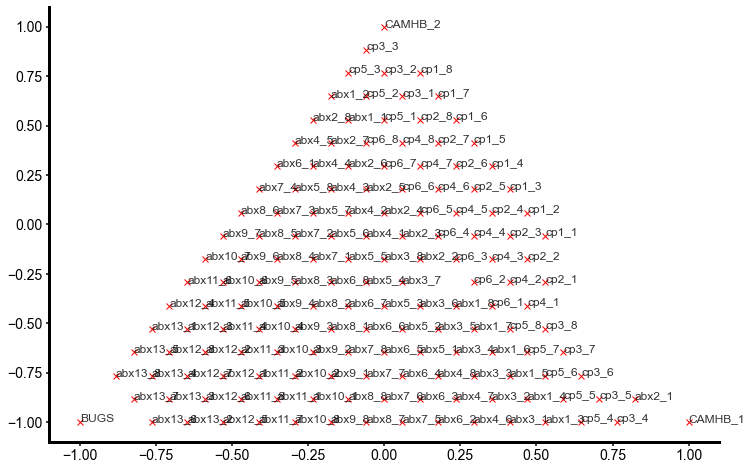

In [12]:
kchip_analyze.cluster_ref(config)
plt.gcf().set_size_inches(12,8)
plt.savefig(out_path+'cluster_reference.png',dpi=300)

Total clusters you should have: 155
Total droplets identified:  282476
(82, 2)


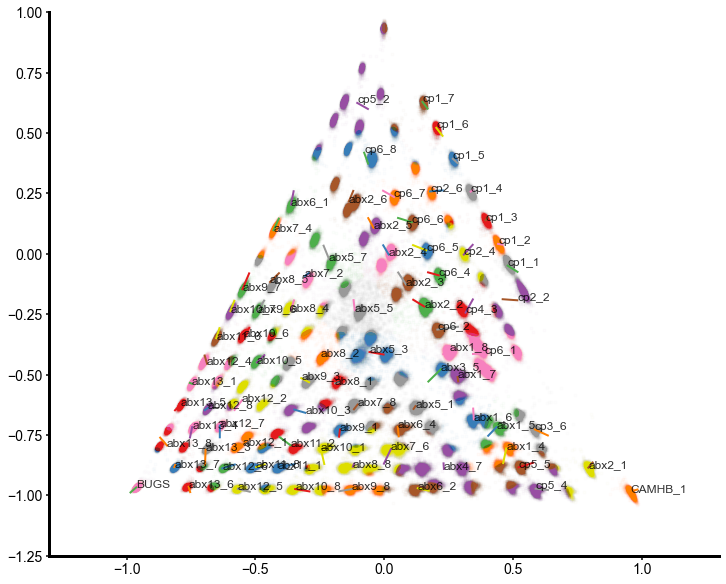

In [13]:
# ASSIGNS LABELS TO CLUSTERS
# Key error will likely appear
# This is because more clusters were found than labels provided
# Fix by increasing the number of min sample from the config file
# OR by using Interactive clustering code
config['barcodes']['cluster']['eps'] = 0.02 
config['barcodes']['cluster']['min_samples'] = 10
x = labels.fillna('_').values.reshape(labels.size,1)
all_labels = x[x != '_'].tolist()
print('Total clusters you should have:',len(all_labels))
fig, ax = plt.subplots()

# Cluster droplets and map apriori labels to clusters
droplets, centroids, on_plane = kchip_analyze.identify_clusters(config,droplets,show=1,ax=ax)
droplets, centroids = kchip_analyze.map_labels_to_clusters(config, droplets, show=1,ax=ax)
# droplets.to_csv('droplets_clustered_scaled.csv')

print ('Total droplets identified: ', droplets.shape[0])
print(centroids.shape)

plt.gca().set_xlim(-1.3,1.3)
plt.gca().set_ylim(-1.25, 1)
plt.gcf().set_size_inches(12,10)
plt.savefig(out_path+'clusters_scaled_uncorr.png',bbox_inches='tight')

In [14]:
# # Import the interactive tools
import kchip.tools.interact as interact

# # Create InteractiveCluster object
centroids = droplets.groupby('Cluster')[['PlaneX','PlaneY']].median().values
rc = interact.InteractiveCluster(droplets[['PlaneX','PlaneY']].values[-5000:,:],centroids)

# Show the plot
interact.bqplt.show()

# Change the point opacities for better viewing, as desired
rc.sca_points.default_opacities = [.2]

In [20]:
# INPUT MISSING CLUSTERS
missing = [] # eg. ['cp_300', 'abx_52e', 'CAMHB_3']

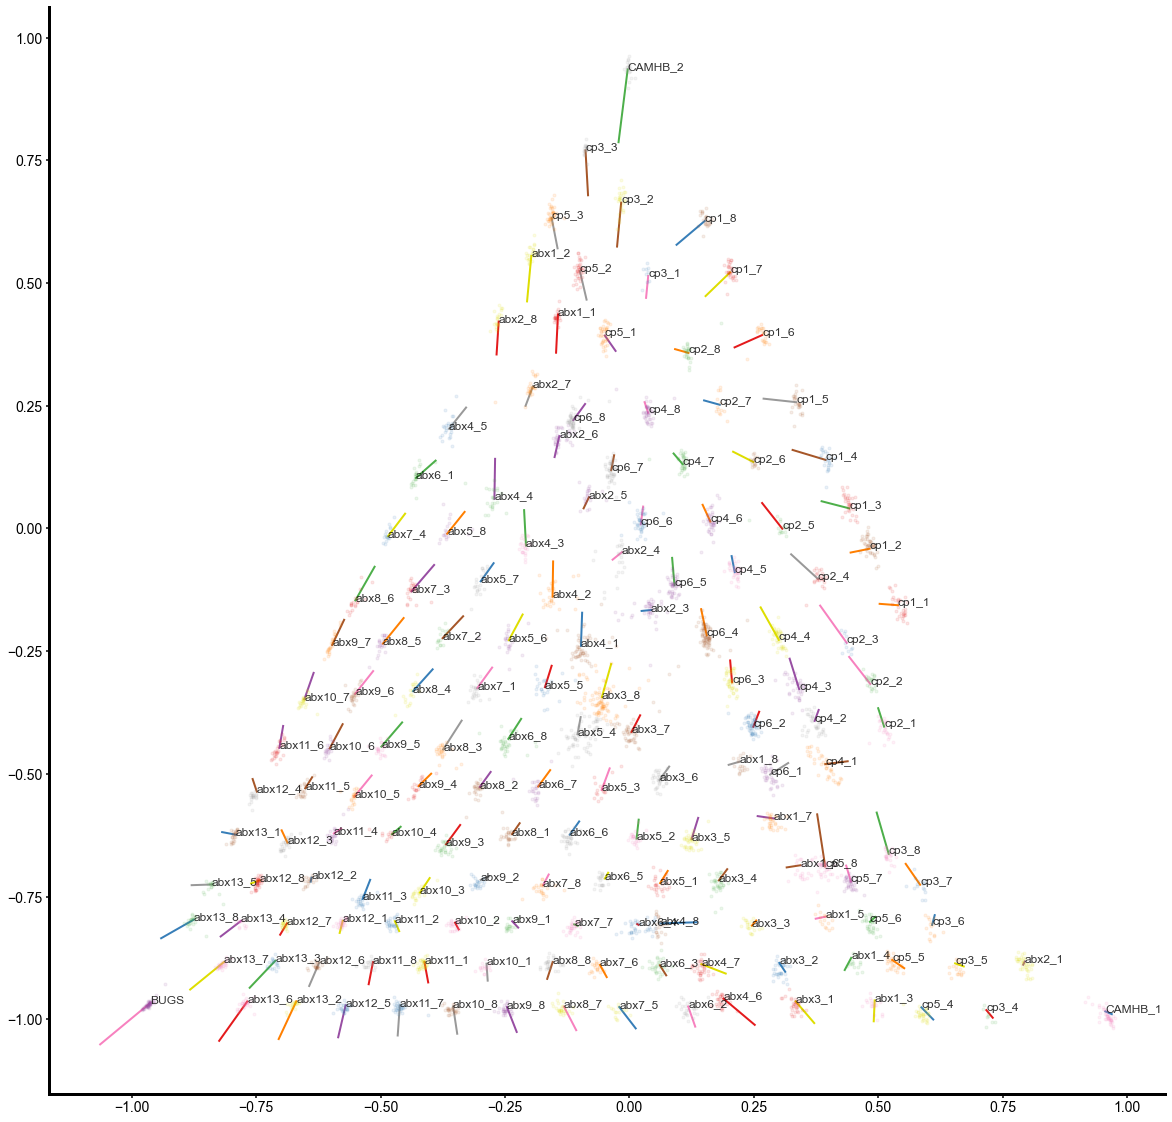

In [21]:
# Update the droplets dataframe with new cluster assignments
droplets['Cluster']=rc.cluster(droplets[['PlaneX','PlaneY']].values)

# Map labels to clusters
fig, ax = plt.subplots(figsize=(20,20))

# Use the updated cluster centroids from the interactive plot
droplets = kchip_analyze.map_labels_to_clusters(config,droplets,missing,show=1,ax=ax)[0]

# Replot the points to view the clusters

d = droplets.loc[:5e3] # only choose the first 5000 points so we don't overload matplotlib
for item in droplets['Cluster'].unique():
    xy = d.query('Cluster=='+str(item))[['PlaneX','PlaneY']].values
    ax.plot(xy[:,0],xy[:,1],'.',alpha=0.1)

# Save the triangle
plt.savefig(out_path+'clusters_scaled_corr.png',bbox_inches='tight')

In [22]:
# SAVE OUTPUT
droplets.to_csv(out_path+'droplets_clustered_corrected_all.csv')

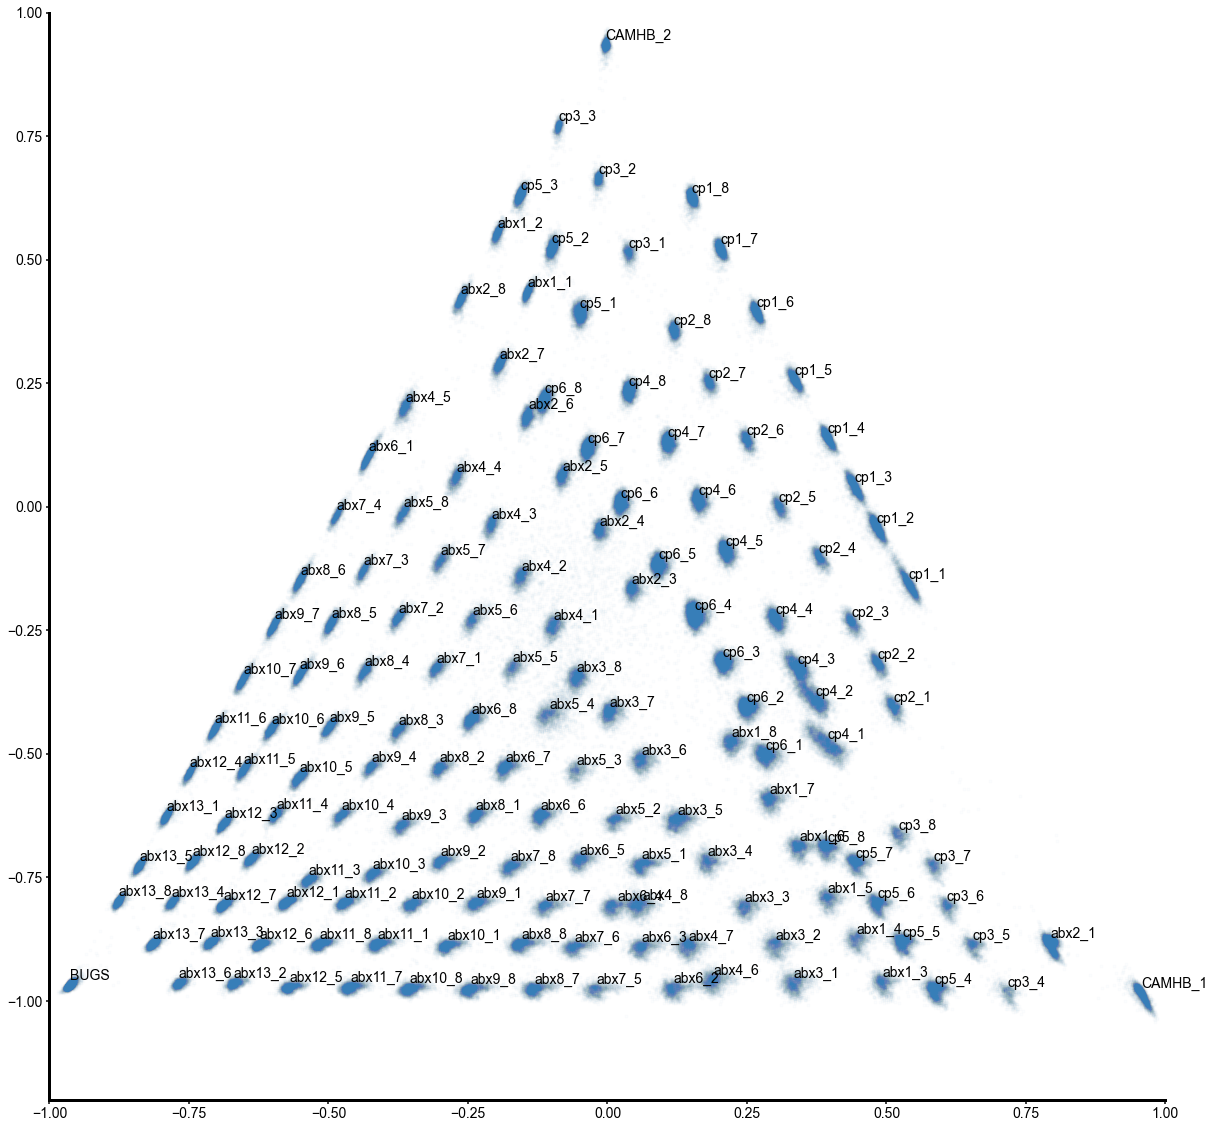

In [23]:
droplets['CentroidX'] = droplets.groupby('Label')['PlaneX'].transform('mean')
droplets['CentroidY'] = droplets.groupby('Label')['PlaneY'].transform('mean')
droplets['distance'] = np.sqrt((droplets.PlaneX-droplets.CentroidX)**2+\
                              (droplets.PlaneY-droplets.CentroidY)**2)
fig, ax = plt.subplots(figsize=(20,20))
plt.xlim([-1,1])
plt.ylim([-1.2,1])
ax.plot(droplets.PlaneX,droplets.PlaneY,'.',alpha=0.01)
d = droplets.groupby('Label').median()[['PlaneX','PlaneY']]
for label in d.index.values:
    ax.text(d.loc[label,'PlaneX'],d.loc[label,'PlaneY']+0.01,label)
plt.savefig(out_path+'experimental_clusters.png',dpi=300)

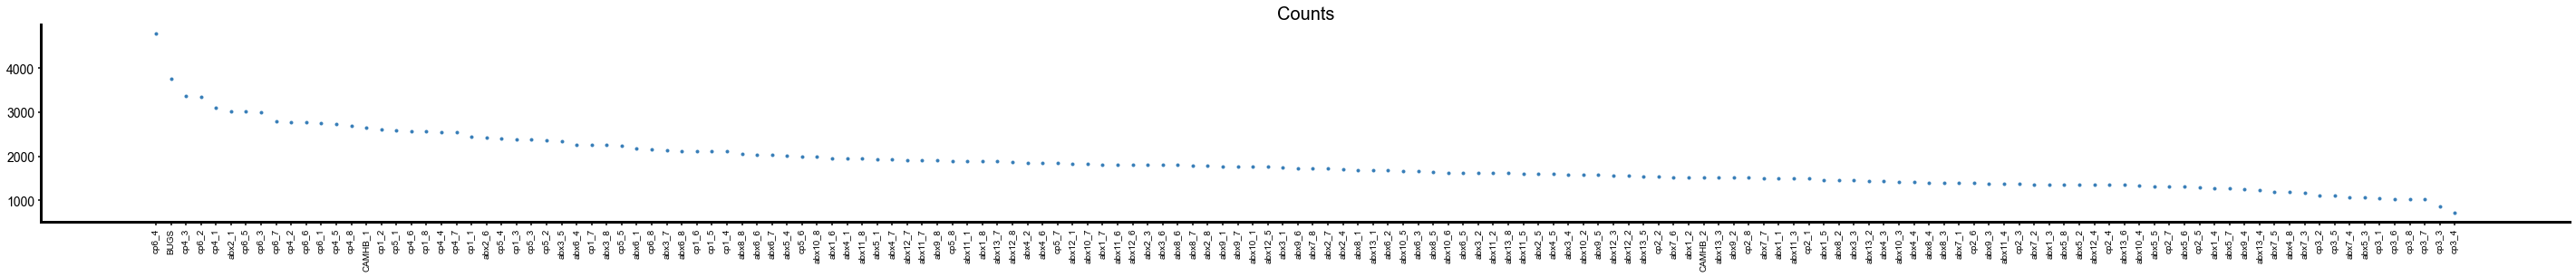

In [24]:
fig, axes = plt.subplots(1,1,figsize=(50,4))
plt.plot(droplets.Label.value_counts(),'.')
axes.set_xticks(range(len(droplets.Label.unique())))
axes.set_xticklabels(droplets.Label.value_counts().index,size=10,rotation=90)
axes.set_title('Counts',size=20)
plt.savefig(out_path+'cluster_count.png',dpi=300,bbox_inches='tight')

# Creates Condensed df (other tp)
- Create pre-merge wells dataFrame
- Loop through post-merge images and identify wells
- Map post-merge wells to pre-merge wells

In [3]:
# If reading in csv file:
droplets = pd.read_csv(out_path+'droplets_clustered_corrected_all.csv',index_col=0)

# Re-read in config file
with open(config_file, 'r') as ymlfile:
    config = yaml.load(ymlfile)

# Identify premerge wells
pre_wells = droplets.groupby(['IndexX','IndexY','Well_ID'],as_index=False)[['ImageX','ImageY']].mean()
print(pre_wells)

# List of timepoints
timepoints = ['t'+str(i) for i in range(tp)]
print(timepoints)

# Analyze data for each timepoint
pre_post_all = []
for timepoint in timepoints:
    print ('Now analyzing timepoint: ', timepoint)
    # Identify postmerge wells and map to pre-merge wells
    pre_post_all.append(kchip_analyze.map_pre_to_post(config,timepoint,pre_wells))

# Condense output
condensed = kchip_analyze.stack_timepoints(droplets,pre_post_all,timepoints,config)
# Pre_post output
pre_post = pd.DataFrame(pre_post_all[0]) 
# Save outputs
pre_post.to_csv(out_path+'pre_post.csv')
condensed.to_csv(out_path+'condensed_output.csv')

       IndexX  IndexY  Well_ID  ImageX  ImageY
0           1       1    487.0  2310.0  1938.0
1           1       1    536.0  1031.5  2203.0
2           1       1    652.0  2386.0  1372.0
3           1       1    681.0  1905.5  2588.5
4           1       1    909.0  1649.0  1883.5
...       ...     ...      ...     ...     ...
85272       7      10   6262.0   382.5   748.0
85273       7      10   6263.0  1636.0   698.0
85274       7      10   6264.0   981.5   547.5
85275       7      10   6265.0  1460.5   312.5
85276       7      10   6266.0  2909.0   526.5

[85277 rows x 5 columns]
['t0']
Now analyzing timepoint:  t0
Now analyzed: 2,1
Now analyzed: 1,6
Now analyzed: 2,9
Now analyzed: 2,4
Now analyzed: 1,2
Now analyzed: 2,2
Now analyzed: 2,5
Now analyzed: 1,8
Now analyzed: 1,4
Now analyzed: 2,7
Now analyzed: 1,1
Now analyzed: 2,3
Now analyzed: 1,9
Now analyzed: 2,10
Now analyzed: 1,5
Now analyzed: 3,3
Now analyzed: 1,7
Now analyzed: 1,10
Now analyzed: 3,4
Now analyzed: 2,6
Now analyzed

/Users/meilinzhu/opt/anaconda3/lib/python3.9/site-packages/skimage/feature/__init__.py:45: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
/Users/meilinzhu/opt/anaconda3/lib/python3.9/site-packages/skimage/feature/__init__.py:45: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
/Users/meilinzhu/opt/anaconda3/lib/python3.9/site-packages/skimage/feature/__init__.py:45: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')
/Users/meilinzhu/opt/anaconda3/lib/python3.9/site-packages/skimage/feature/__init__.py:45: skimage_deprecation: Function ``register_translation``

# Images Analyzed, Load in Data

In [6]:
# Read in droplets and condensed
droplets = pd.read_csv(out_path+'droplets_clustered_corrected_all.csv',\
                       index_col=0)
pre_post = pd.read_csv(out_path+'pre_post.csv',index_col=0)
condensed = pd.read_csv(out_path+'condensed_output.csv', index_col=0)

# Quality Control (filtering)

In [27]:
import kchip.data_cleanup as kchip_data
# merge your droplets and condensed df's and it going to dereplicate "left" and "right"
trimmed = kchip_data.derep(droplets,condensed)
trimmed.to_csv(out_path+'condensed_droplets_merged.csv')

In [28]:
trimmed = pd.read_csv(out_path+'condensed_droplets_merged.csv',index_col=0)

In [29]:
trimmed.head()

Hash Label_left  IndexX_left  IndexY_left  ImageX_left  \
0 -9223354624473552021     abx4_2            1            4          654   
1 -9222822713018978160     abx3_3            2           10         1863   
2 -9222811501271744511    abx10_1            6            7          662   
3 -9222711463941579172     abx1_2            5           10         1615   
4 -9222403457095506612     abx8_4            6            5         1809   

   ImageY_left  Radius_left  Dye 0_left  Dye 1_left  Dye 2_left  ...  cp6_2  \
0          539           11     3560.64     2129.88     4636.80  ...    NaN   
1         2239           11     4014.04     6994.40     2121.66  ...    0.0   
2          961           11     9276.64     5013.60     1593.78  ...    0.0   
3          120           11     2479.40      315.44     9153.36  ...    0.0   
4          572           11     6489.40     1478.40     4147.74  ...    0.0   

   cp6_3  cp6_4  cp6_5  cp6_6  cp6_7  cp6_8  Total  t0_Area          t0  
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN         NaN  
1    0.0    0.0    0.0    0.0    0.0    0.0    2.0   1129.0  883.532329  
2    0.0    0.0    0.0    0.0    0.0    0.0    2.0   1182.0  353.987310  
3    0.0    0.0    0.0    0.0    0.0    0.0    2.0    970.0  111.802062  
4    1.0    0.0    0.0    0.0    0.0    0.0    2.0   1107.0  617.407407  

[5 rows x 206 columns]

In [30]:
# Calculates centroids and barcode distances and normalizes reporter signal
trimmed = kchip_data.calc_QC(trimmed,tp)
trimmed.to_csv(out_path+'norm_condensed_droplets_merged.csv')

## Distance and Area Filtering

In [8]:
trimmed = pd.read_csv(out_path+'norm_condensed_droplets_merged.csv',index_col=0)
trimmed.shape

(88415, 209)

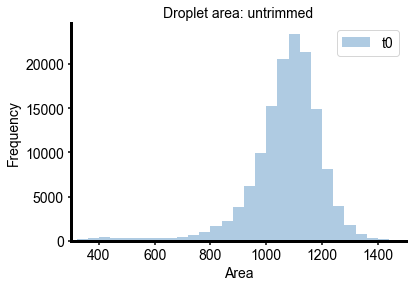

In [32]:
plt.hist(trimmed['t0_Area'],bins=50,range=(0,2000), label = 't0', alpha=0.4)
# plt.hist(trimmed['t1_Area'],bins=50,range=(0,1000), label = 't1', alpha=0.4)
# plt.hist(trimmed['t2_Area'],bins=50,range=(0,1000), label = 't2', alpha=0.4)
# plt.hist(trimmed['t3_Area'],bins=50,range=(0,1000), label = 't3', alpha=0.4)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Droplet area: untrimmed')
plt.xlim(300,1500)
plt.legend()
plt.savefig(out_path+'area_hist.png',dpi=300,bbox_inches='tight')

Text(0.5, 0.98, 'Barcode distances: untrimmed')

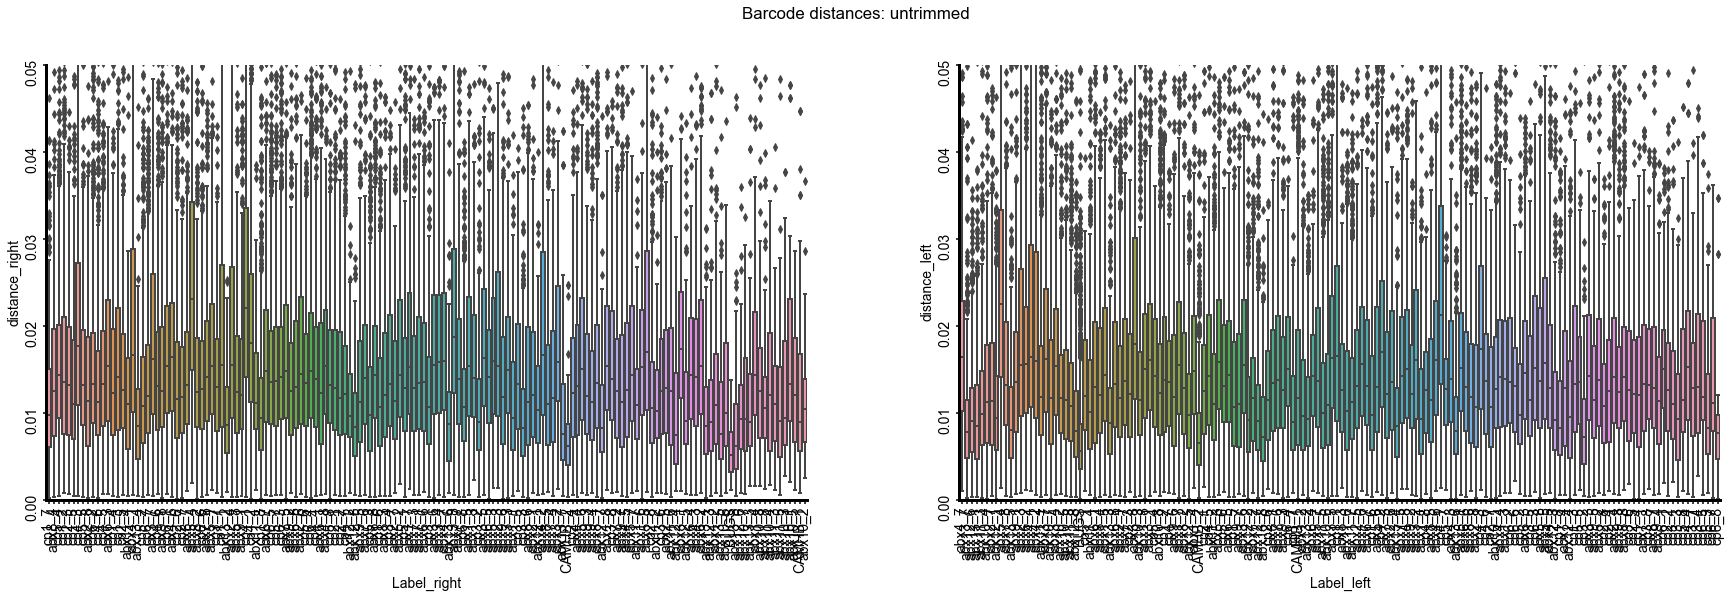

In [10]:
# To test barcode distances:
Ldist = trimmed[['Label_left','distance_left']]
# Lcolumn_order = guides
Rdist = trimmed[['Label_right','distance_right']]
# Rcolumn_order = targets

f, axes = plt.subplots(1, 2, figsize=(30,8))
sns.boxplot(x='Label_left',y='distance_left',data=Ldist, ax=axes[1])
sns.boxplot(x='Label_right',y='distance_right',data=Rdist, ax=axes[0])
for ax in f.axes:
    ax.tick_params(labelrotation=90)
ylim = [0.0,0.05]
plt.setp(axes, ylim=ylim)
f.suptitle('Barcode distances: untrimmed')
# plt.savefig(out_path+'barcode_dist_boxplot.png',dpi=300,bbox_inches='tight')

In [34]:
Ldistance_trimmed = trimmed[trimmed['distance_left']<0.03]
distance_trimmed = Ldistance_trimmed[Ldistance_trimmed['distance_right']<0.03]
print("barcode untrimmed",trimmed.shape)
print("barcode trimmed",distance_trimmed.shape)

barcode untrimmed (146083, 209)
barcode trimmed (126378, 209)


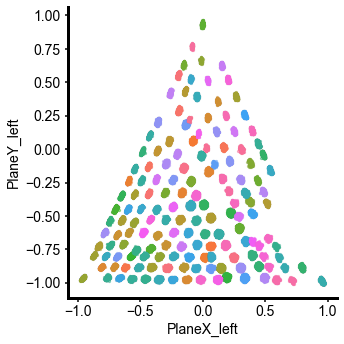

In [35]:
g = sns.FacetGrid(distance_trimmed, hue="Label_left", size=5)
g.map(plt.scatter, "PlaneX_left", "PlaneY_left", s=5, alpha=.5);# g.add_legend();
plt.savefig(out_path+'barcode_triangle_trimmed_left.png',dpi=300,bbox_inches='tight')

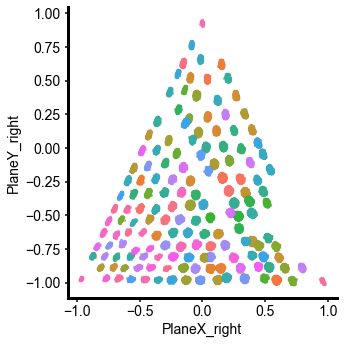

In [36]:
f = sns.FacetGrid(distance_trimmed, hue="Label_right", size=5)
f.map(plt.scatter, "PlaneX_right", "PlaneY_right", s=5, alpha=.5);# f.add_legend();
plt.savefig(out_path+'barcode_triangle_trimmed_right.png',dpi=300,bbox_inches='tight')

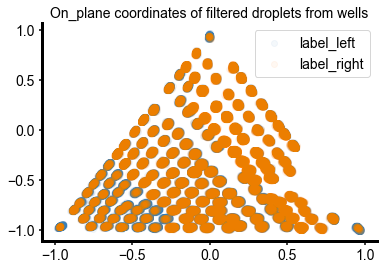

In [37]:
# Plots droplets onto the triangle, filtered
plt.scatter(distance_trimmed['PlaneX_left'],distance_trimmed['PlaneY_left'],alpha=0.05, label = 'label_left')
plt.scatter(distance_trimmed['PlaneX_right'],distance_trimmed['PlaneY_right'],alpha=0.05, label = 'label_right')
plt.gca().set_title('On_plane coordinates of filtered droplets from wells')
plt.legend()
plt.savefig(out_path+'barcode_triangle_trimmed_all.png',dpi=300,bbox_inches='tight')

In [38]:
d_area_trimmed = distance_trimmed[distance_trimmed['t0_Area']<1300]
d_area_trimmed = d_area_trimmed[d_area_trimmed['t0_Area']>800]
print("aread trimmed",d_area_trimmed.shape)
d_area_trimmed.to_csv(out_path+'distance_and_area_filtered.csv')

aread trimmed (117128, 209)


## Well Locations

In [39]:
d_area_trimmed = pd.read_csv(out_path+'distance_and_area_filtered.csv',index_col=0)

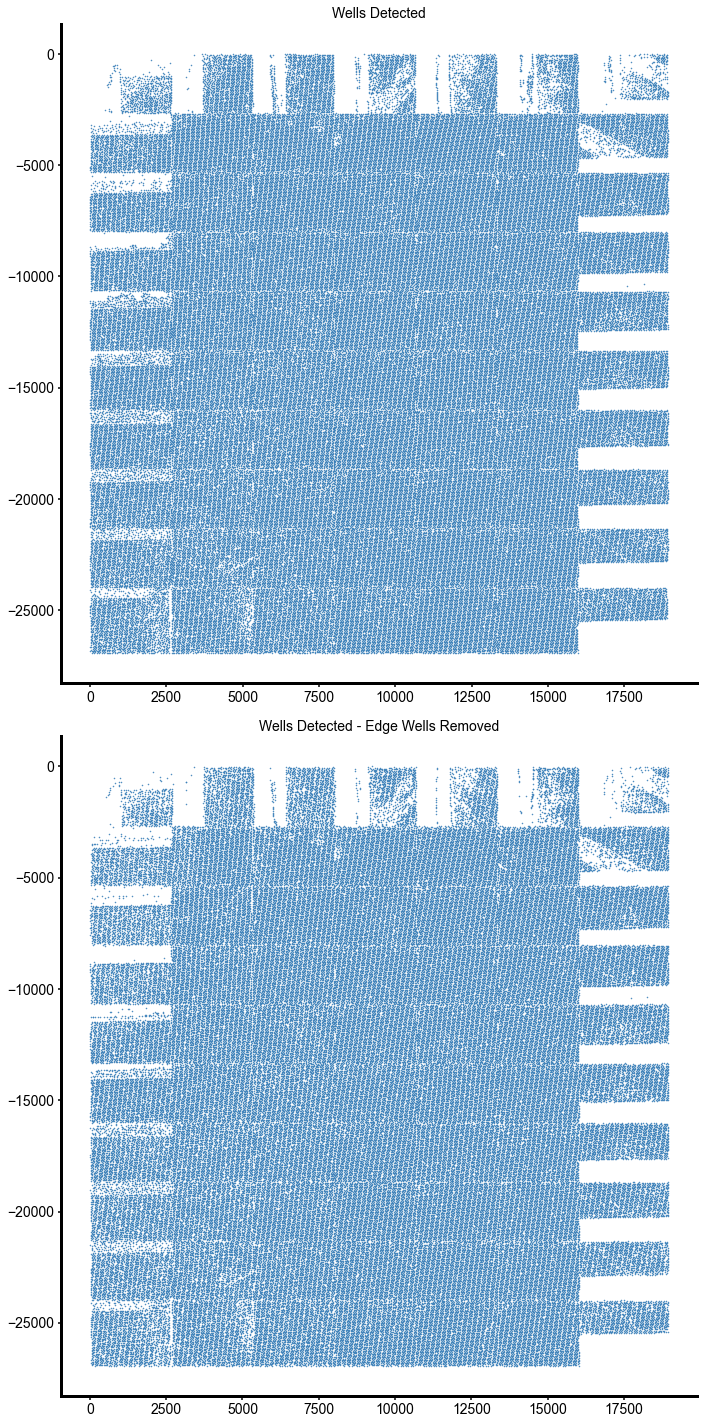

In [40]:
# Plot locations of all identified droplets on 2D plane to represent the chip
# Can identify portion of chip where droplet identification failed
# Regions may due to cross merging
fig, axes = plt.subplots(2,1,figsize=(10,20))

axes[0].plot(pre_post['Pre_GlobalX'],-pre_post['Pre_GlobalY'],'.',ms=1)
axes[0].set_title('Wells Detected')
# axes[0].set_axis_off()

axes[1].plot(pre_post['Post_GlobalX'],-pre_post['Post_GlobalY'],'.',ms=1)
axes[1].set_title('Wells Detected - Edge Wells Removed')
# axes[1].set_axis_off()
plt.tight_layout()
plt.savefig(out_path+'droplet_chip_location.png',dpi=300,bbox_inches='tight')

## Label Counts

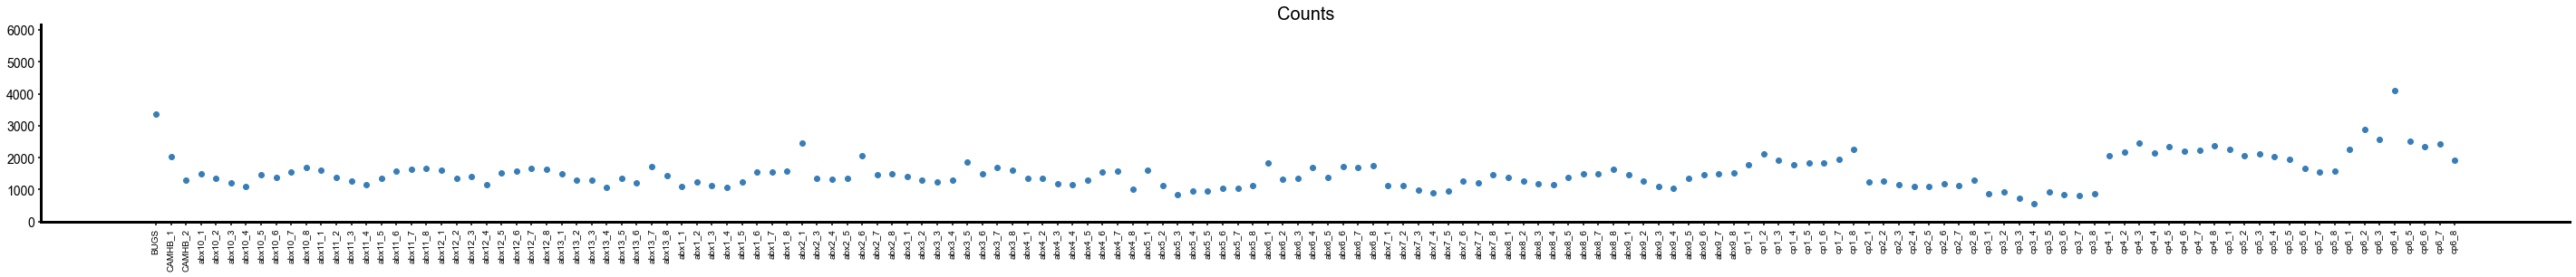

In [41]:
left_count = d_area_trimmed['Label_left'].value_counts()
right_count = d_area_trimmed['Label_right'].value_counts()
counts = left_count + right_count

fig, axes = plt.subplots(1,1,figsize=(50,4))
axes.plot(counts.values,'o')
axes.set_xticks(range(len(counts.index.values)))
axes.set_xticklabels(counts.index.values,size=10,rotation=90)
plt.ylim(0, 1.5*max(counts))
axes.set_title('Counts',size=20)
plt.savefig(out_path+'Label_counts.png',bbox_inches='tight',dpi=300)

# MIC Analysis

In [9]:
import kchip.MIC_analysis as kchip_MIC
d_area_trimmed = pd.read_csv(out_path+'distance_and_area_filtered.csv',index_col=0)

# of bug controls: 44
# of media controls: 53


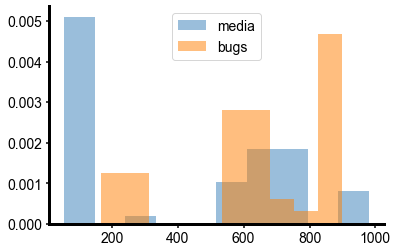

In [10]:
bug_drops = d_area_trimmed[(d_area_trimmed.Label_left.str.contains('BUGS')) & (d_area_trimmed.Label_right.str.contains('BUGS'))]
media_drops = d_area_trimmed[(d_area_trimmed.Label_left.str.contains('CAMHB')) & (d_area_trimmed.Label_right.str.contains('CAMHB'))]
print('# of bug controls: '+ str(len(bug_drops)))
print('# of media controls: '+ str(len(media_drops)))
plt.hist(media_drops.t0_norm2,density=True,alpha=0.5,label='media')
plt.hist(bug_drops.t0_norm2,density=True,alpha=0.5,label='bugs')
plt.legend()
plt.savefig(out_path+'controls.png',dpi=300,bbox_inches='tight')

In [11]:
d_area_trimmed = pd.read_csv(out_path+'distance_and_area_filtered.csv',index_col=0)
d_area_trimmed,MED = kchip_MIC.MIC_boot_(d_area_trimmed,tp,'CAMHB','BUGS')
d_area_trimmed.to_csv(out_path+'distance_and_area_filtered_v1.csv')
MED.to_csv(out_path+'summary_data.csv')
for i in range(tp):
    kchip_MIC.calc_zfactor(d_area_trimmed,'CAMHB','BUGS',i)

-9.687627836106818 0.9999999999999999 0.8770178233801231 0.1591610072494336 0.2789682374797664


In [7]:
out_path

'../output/Pa1_g1_chip1_dp0/Pa1_g1_chip1'

In [12]:
d_area_trimmed = pd.read_csv(out_path+'distance_and_area_filtered_v1.csv',index_col=0)

['abx1', 'abx10', 'abx11', 'abx12', 'abx13', 'abx2', 'abx3', 'abx4', 'abx5', 'abx6', 'abx7', 'abx8', 'abx9', 'cp1', 'cp2', 'cp3', 'cp4', 'cp5', 'cp6'] 19


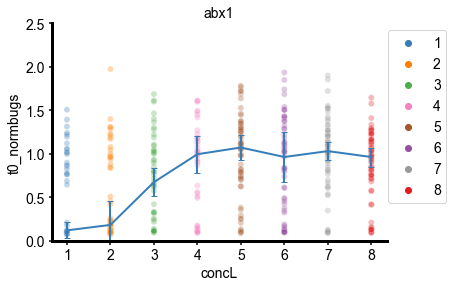

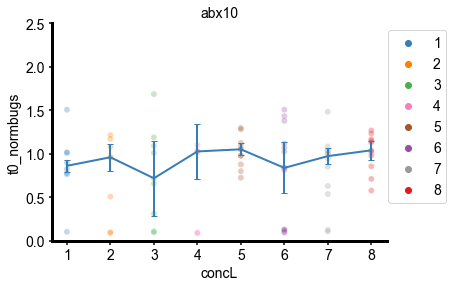

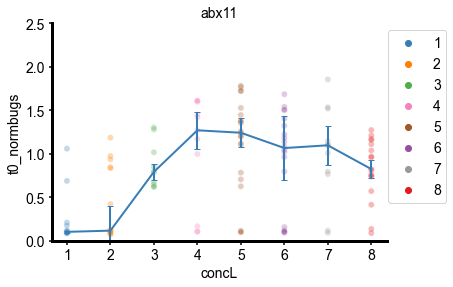

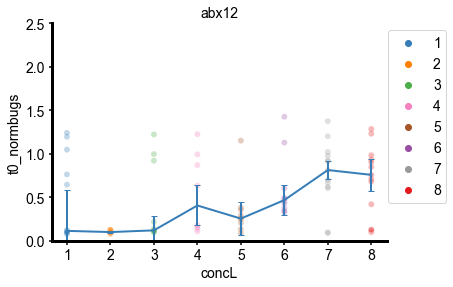

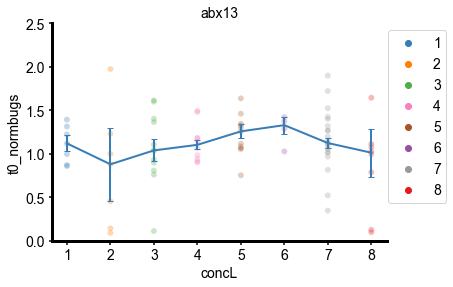

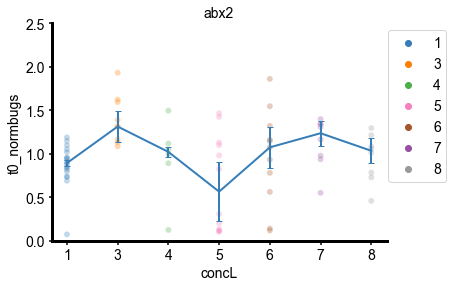

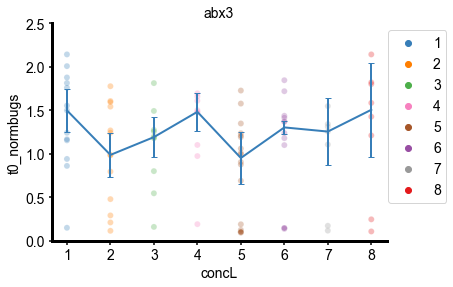

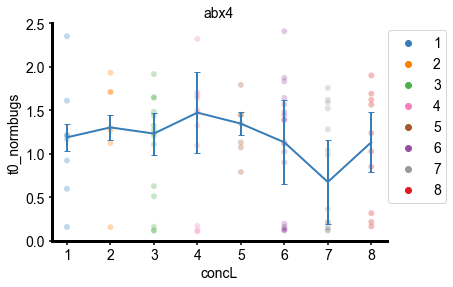

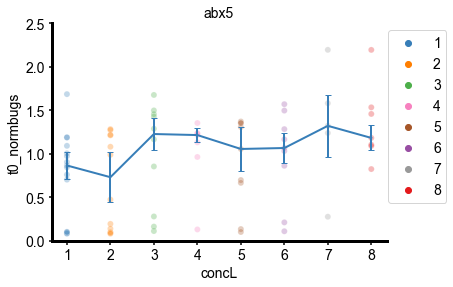

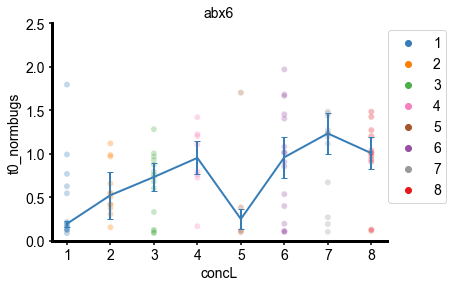

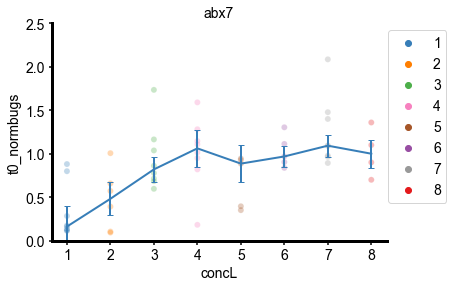

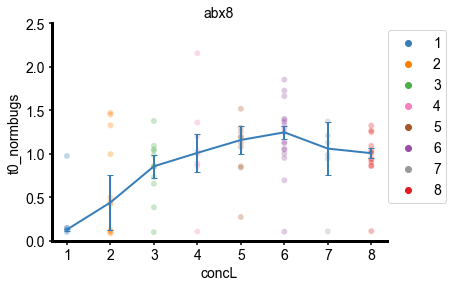

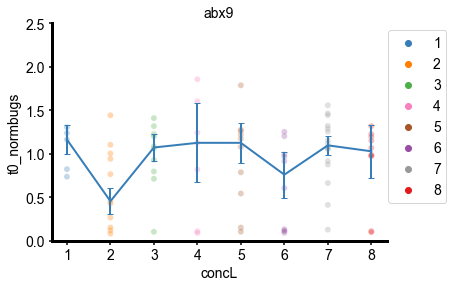

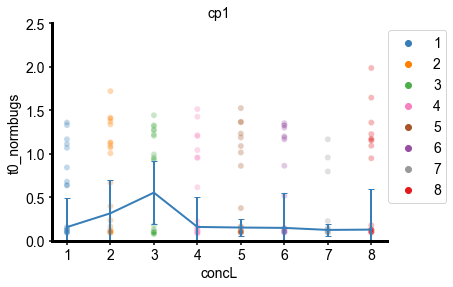

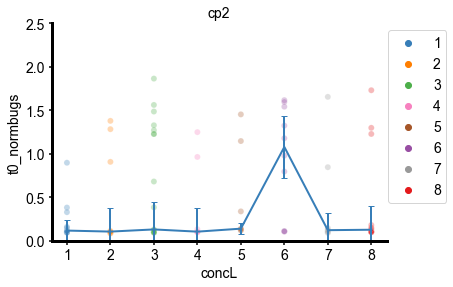

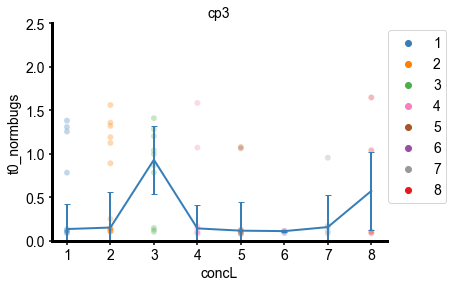

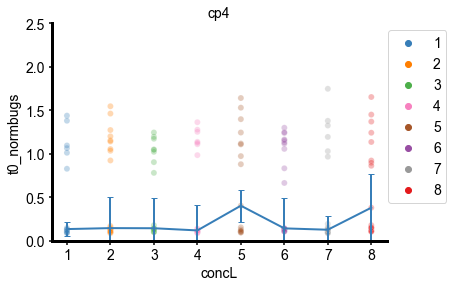

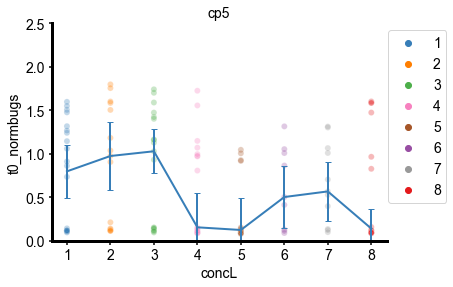

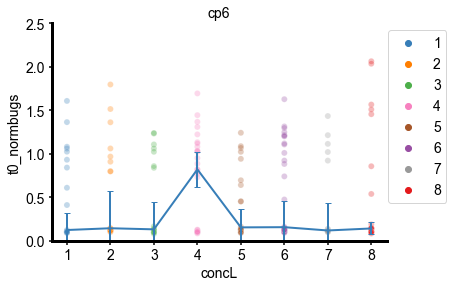

In [13]:
kchip_MIC.plot_MIC(d_area_trimmed,out_path,0,'CAMHB','BUGS') # last argument: timepoint tX

# Bliss score and R2

In [4]:
import statistics as st
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import multiprocessing as mp
from pathos.multiprocessing import ProcessingPool as Pool
import os, time
import glob
import itertools
import re
from cycler import cycler
import kchip.bliss_score as bliss
import kchip.r_squared as r2

In [5]:
file = out_path+'distance_and_area_filtered_v1.csv'
df = pd.read_csv(file,index_col=0)

strain = re.split('_',file)[0][-3:]
output_path = out_path + 't0_norm2'

#define plotting parameters
bliss.parameters()
#establish dataframe for abxabx_int
df,aabx,bugbugctrl = bliss.establish_df(df)
#develop dataframe for statistical analysis
abxm_med, abxm_std, abxm_count, abxm_annot,order = bliss.df_stats(aabx)
#mask to remove upper triangle from heatmap
mask = bliss.mask(abxm_med)
#heatmap of droplet counts, median growth, and growth std
bliss.base_plots(mask,strain,output_path,abxm_count,abxm_med,abxm_std,abxm_annot)
#convert growth activity to growth inhibition dataframe
growthinh,abx_sort_ = bliss.growth_inh(abxm_med,df,bugbugctrl)
#calculate BLISS score for each abxabx_int and create dataframe
bliss_df = bliss.df_bliss(order,output_path,growthinh,abx_sort_)
#plot distribution AND heatmap of BLISS scores for all abxabx combos 
bliss.indv_bliss(output_path,bliss_df,strain,mask,abxm_med)
#plot distribution AND heatmap of BLISS scores for global abxabx combos
bliss.sum_bliss(output_path,bliss_df,strain,order)

In [91]:
# From bliss_score.py in code base, using here to tweak plot parameters
def base_plots(mask,strain,output_path,abxm_count,abxm_med,abxm_std,abxm_annot):
    # abxm_count plot
    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(abxm_count.fillna(0),annot=True,mask=mask,cmap='coolwarm',cbar_kws={'pad':0.01,'aspect':50}, xticklabels=True, yticklabels=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(strain+' replicate counts')
    plt.savefig(output_path+'_abxabx_countsmap.png',bbox_inches='tight',dpi=300)

    # growth plot
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(abxm_med.fillna(0),annot=abxm_annot,fmt = '',\
                mask=mask,cmap='coolwarm',cbar_kws={'pad':0.01,'aspect':50}, xticklabels=True, yticklabels=True)
    for i in np.arange(0,abxm_med.shape[1]+1,3):
        plt.axvline(i, color='white', lw=2)
        plt.axhline(i, color='white', lw=2)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(strain+' Median Relative Growth (A.F.U.)')
    plt.savefig(output_path+'_abxabx_heatmap.png',bbox_inches='tight',dpi=300)

    # std plot
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(abxm_std.fillna(0),annot=abxm_annot,fmt = '',\
                mask=mask,cmap='coolwarm',cbar_kws={'pad':0.01,'aspect':50}, xticklabels=True, yticklabels=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(strain+' Stdev Relative Growth (A.F.U.)')
    plt.savefig(output_path+'_abxabx_stdevmap.png',bbox_inches='tight',dpi=300)

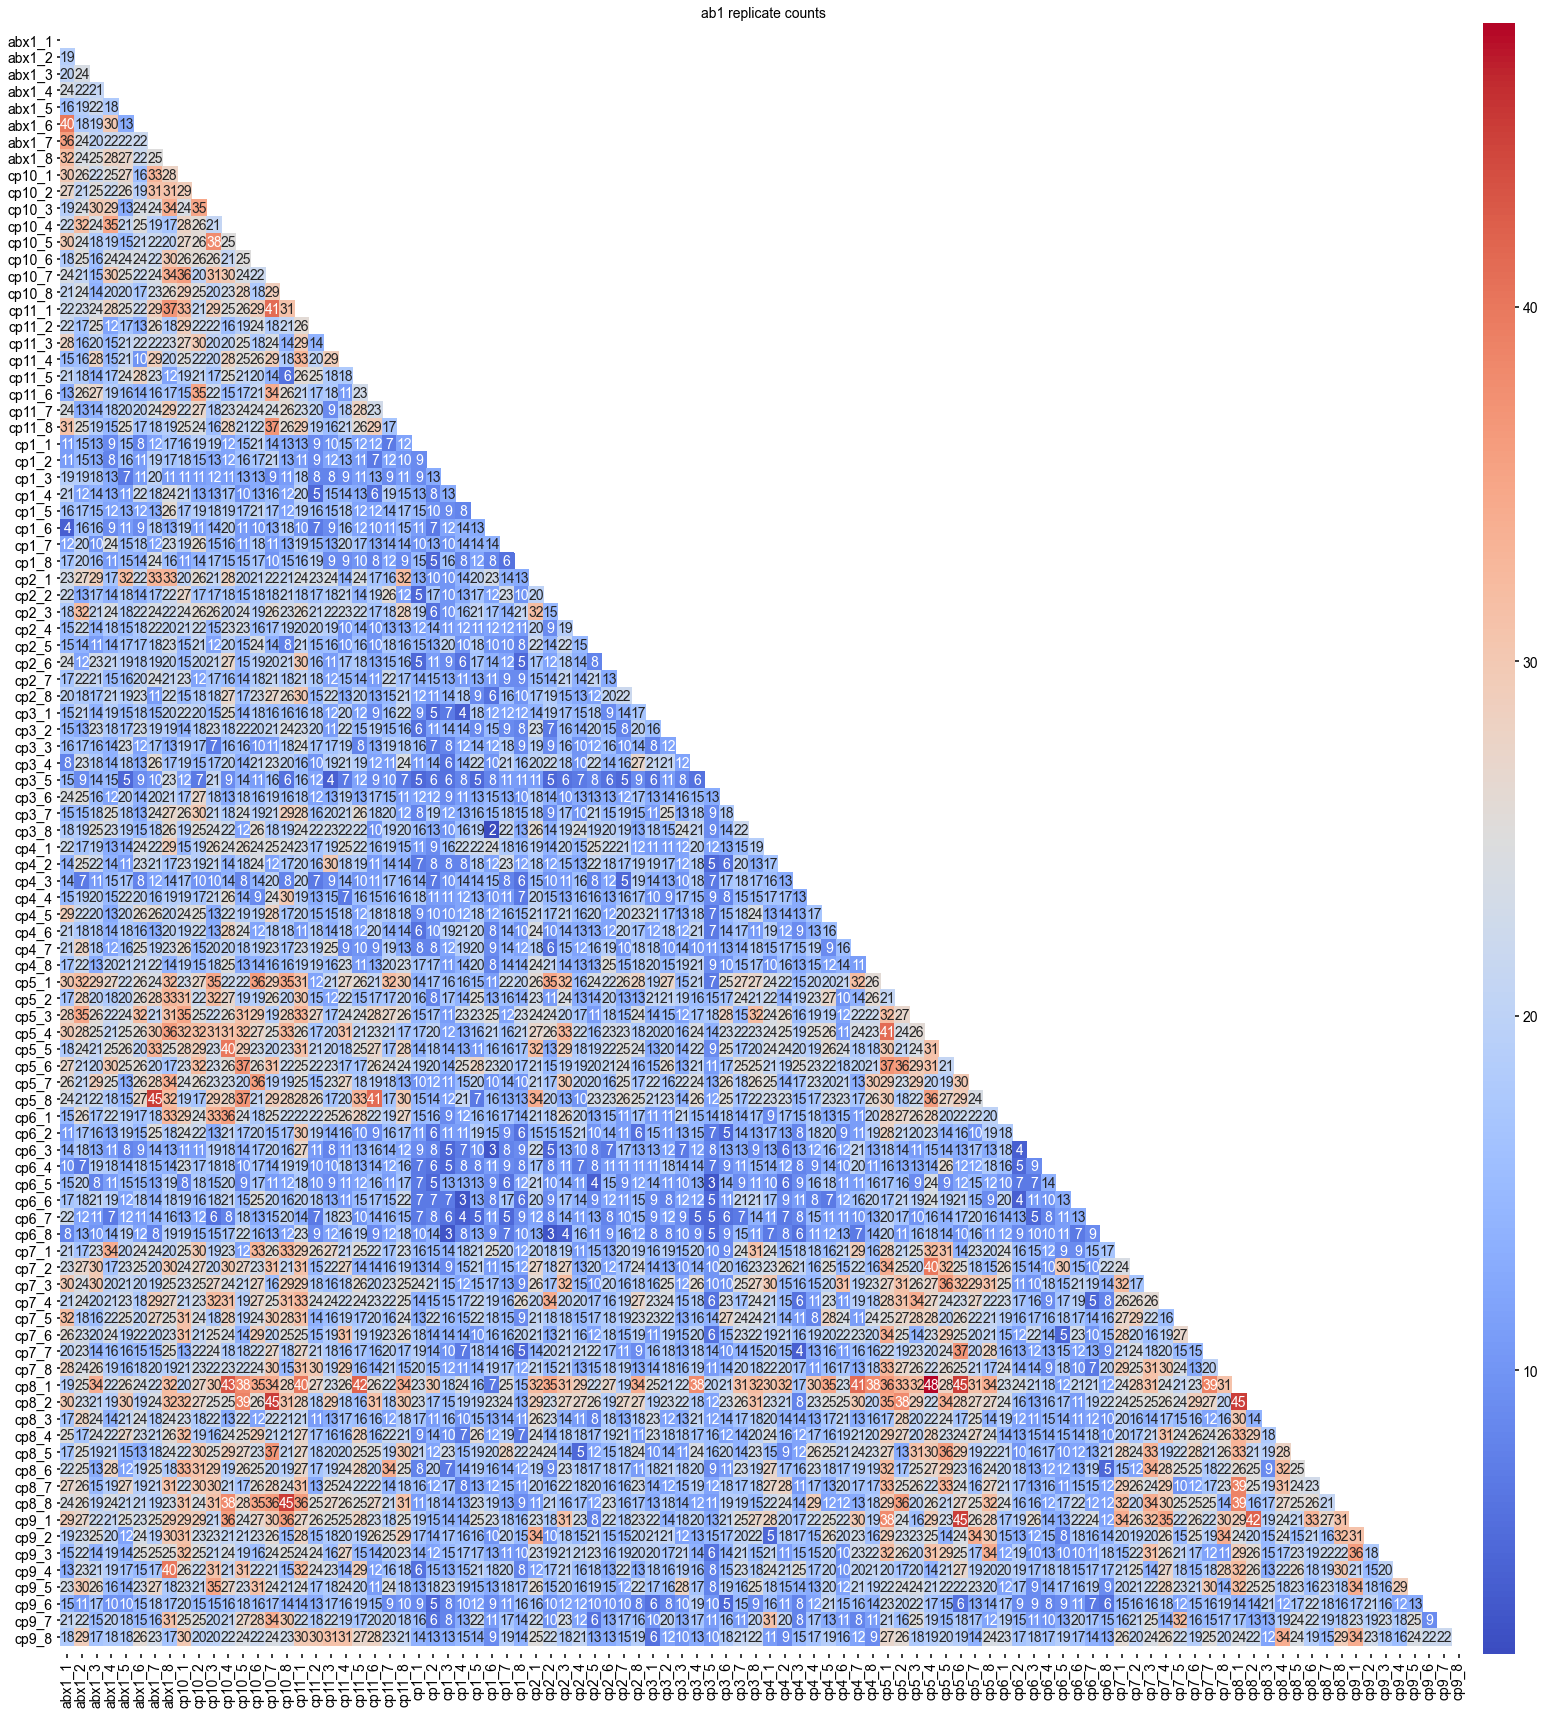

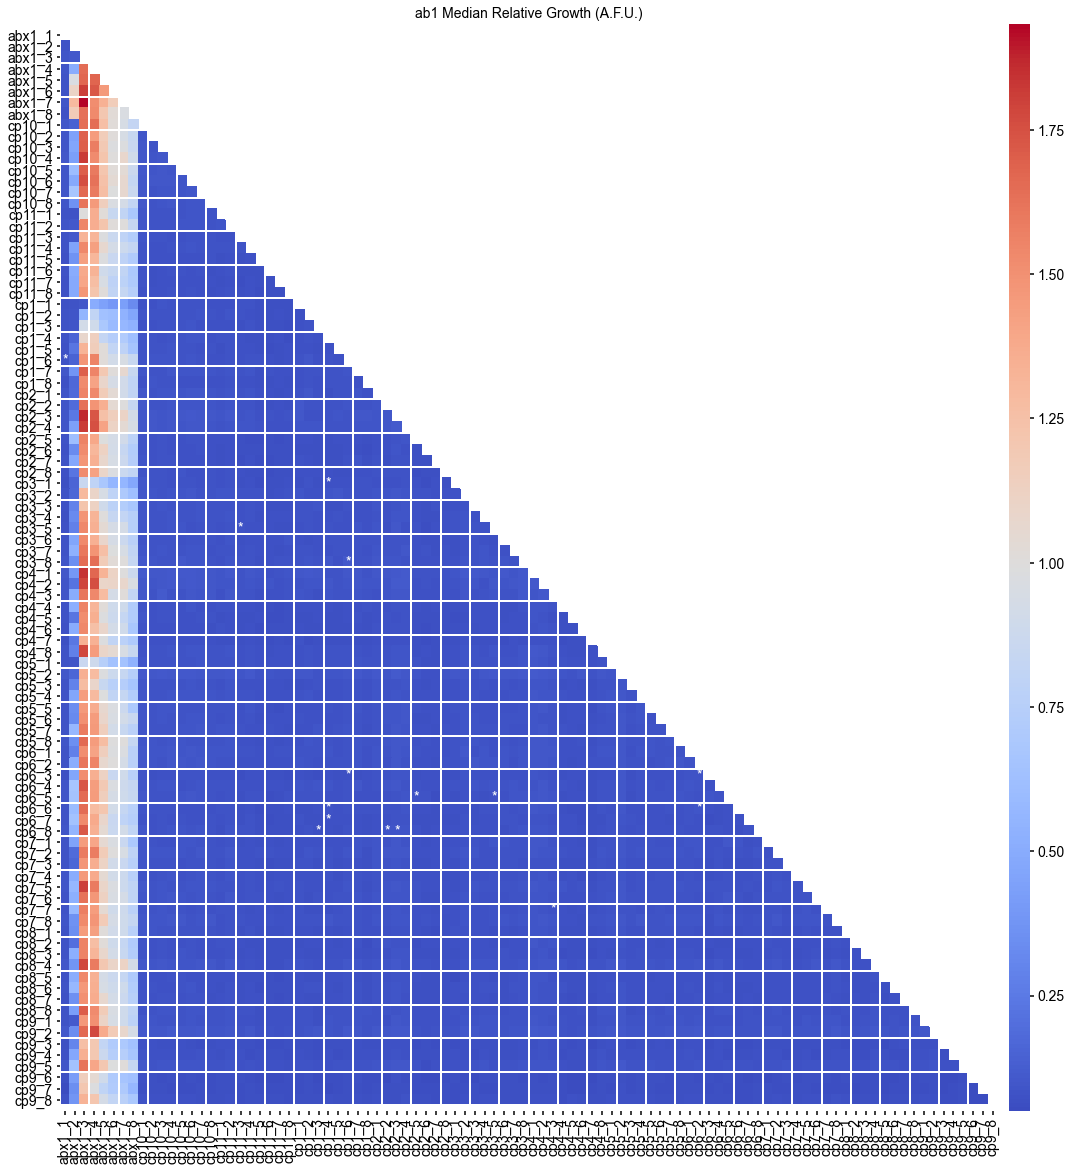

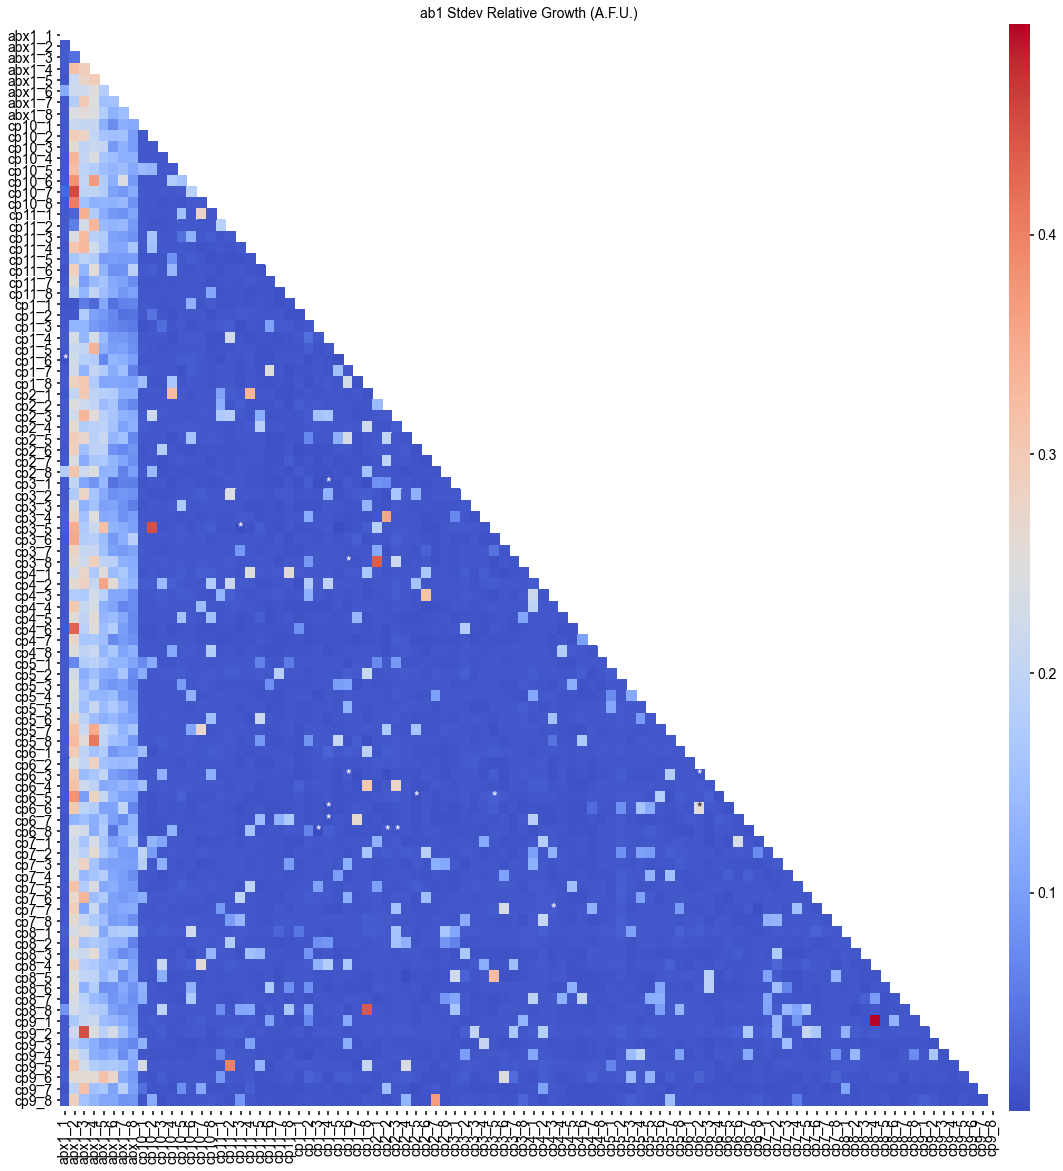

In [92]:
base_plots(mask,strain,output_path,abxm_count,abxm_med,abxm_std,abxm_annot)

working on  ../output/day1_Ab1_ON_redo/20210222_Ab1_ON_redo_distance_and_area_filtered_v1.csv


100%|██████████| 20/20 [12:46<00:00, 38.35s/it]


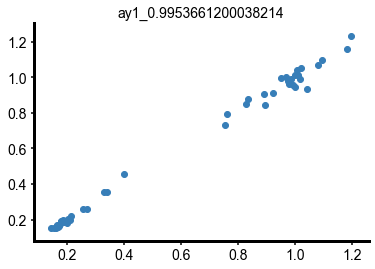

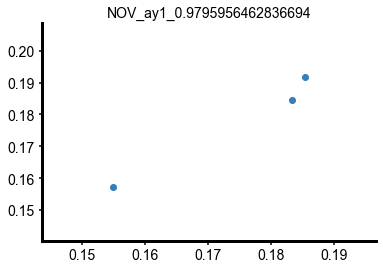

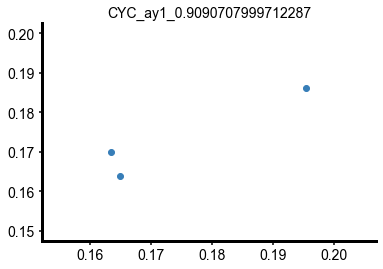

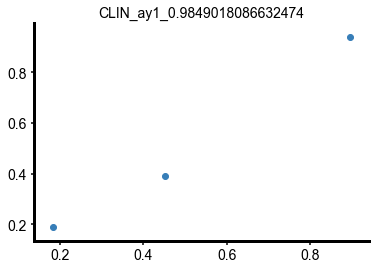

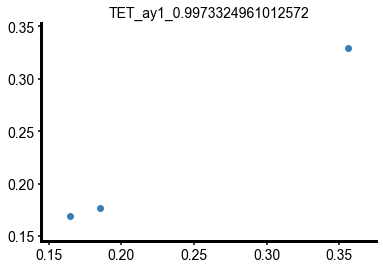

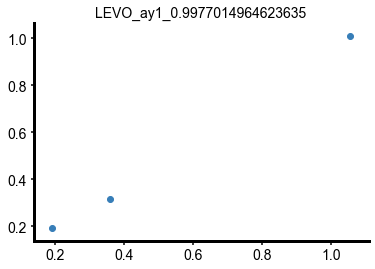

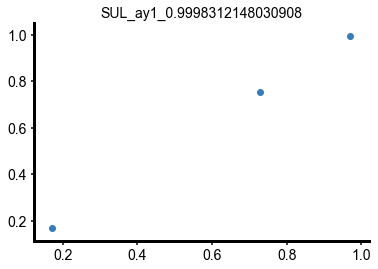

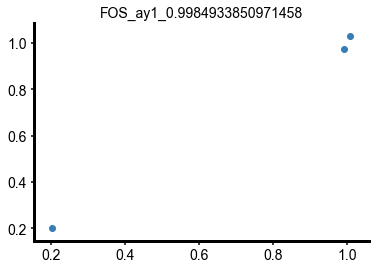

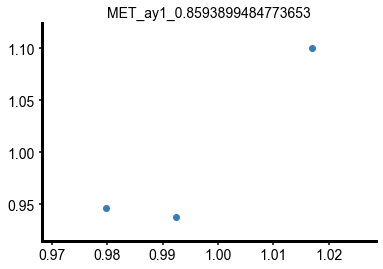

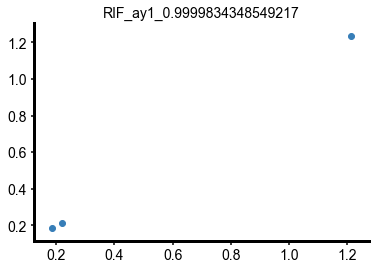

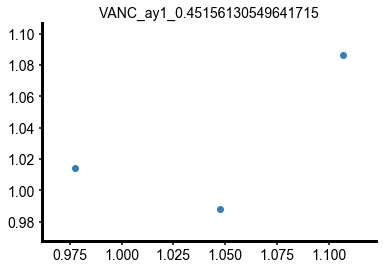

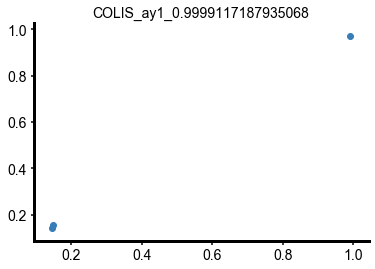

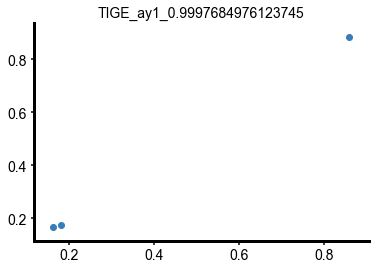

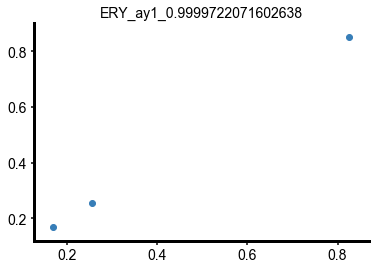

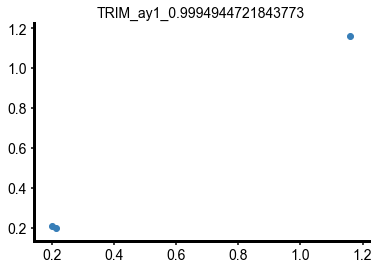

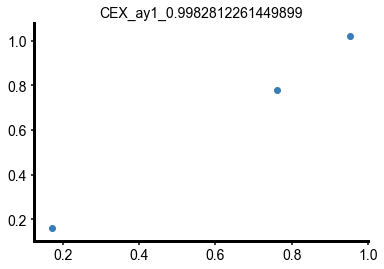

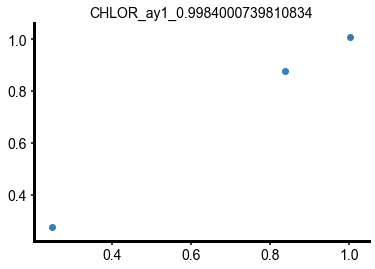

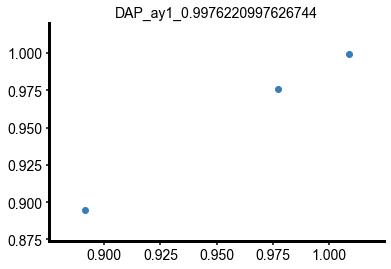

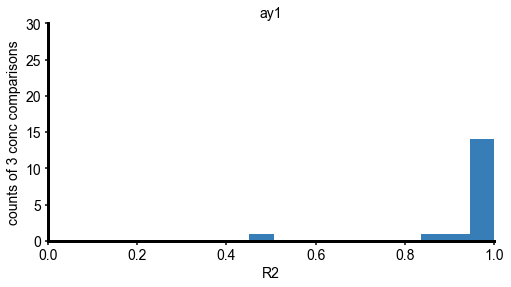

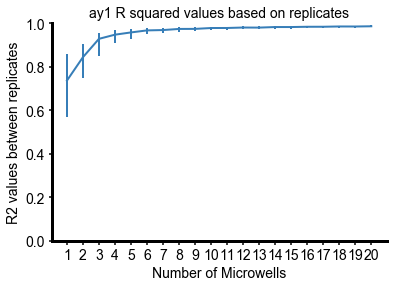

In [38]:
file = out_path+'distance_and_area_filtered_v1.csv'
print('working on ',file)
strain = re.split('_',file)[0][-3:]
output_path = out_path + 't0_norm2'

r2.parameters()
info_df = r2.conc_df(file,strain)
r_squared = r2.bug_correlation(strain,output_path,info_df)
r2_abx, R2_df = r2.abx_correlation(strain,output_path,info_df)
r2.r2_distr(strain,R2_df)
bs_R2, num_reps = r2.bootstrap(output_path,info_df)
r2.replicate_plot(strain,num_reps,output_path,bs_R2)